<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette activité est réalisée dans le cadre du cours ``Analysez vos données textuelles`` diffusé en MOOC par
**<font color='blus'>Openclassrooms</font>**.
</p>    


In [1]:
import p6_util_activity 

#-----------------------------------------------------------------------------
# When this flag is activated,  then a subset of CNN files are read.
# When value is False, then all CNN files are read. in this case, make sure 
# you've at leat 16G RAM available and to run over 64bits station.
#-----------------------------------------------------------------------------
is_partial_read=True
max_read_count=100
file_path ="./data/cnn_new"

For each pair of files, frequencies are recorded into dictionary ``dict_article_highlight`` as component of a tuple.

Format of ``dict_article_highlight`` is as following : ``{#ID:(tokenized_article,tokenized_highlight,dict_article_freq,dict_highlight_freq)}``

* ``tokenized_article`` : list of tokens issued from article
* ``tokenized_highlight`` : list of tokens issued from highlight
* ``dict_article_freq`` is formated as : ``{token:token_frequency}``
* ``dict_highlight_freq`` is formated as : ``{token:token_frequency}``

In [2]:
data_path = './data/cnn/stories'
dict_article, dict_highlight = p6_util_activity.read_cnn_corpora(data_path, p_restriction=None, read_count=max_read_count)

print(len(dict_article), len(dict_highlight))


100 100


#### Frequencies computing over raw articles and highlights

* Frequencies are computed for both type of content (raw articles and raw highlights)

In [3]:
import p6_util_activity

dict_article_freq = p6_util_activity.compute_frequency_sentence(dict_article)
print("Taille du dictionnaire des frequences de mots pour les articles: "+str(len(dict_article_freq.keys())))

dict_highlight_freq = p6_util_activity.compute_frequency_sentence(dict_highlight)
print("Taille du dictionnaire des frequences de mots pour les hightlights: "+str(len(dict_highlight_freq.keys())))


Taille du dictionnaire des frequences de mots pour les articles: 15891
Taille du dictionnaire des frequences de mots pour les hightlights: 2301


**Plot of word frequencies from raw files**

* Plot of frequencies for hilights.

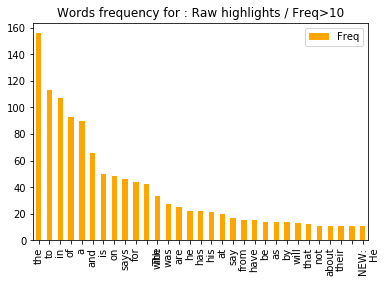

In [5]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_highlight_freq,"Raw highlights",query="Freq>10")

* Plot of frequencies for articles.

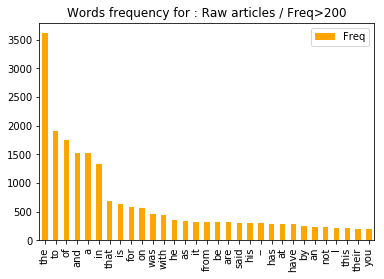

In [6]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_article_freq,"Raw articles",query="Freq>200")

#### TF-IDF computing for raw articles and highlights

* TF-IDF are computed for both type of content (raw articles and raw highlights)

In [7]:
import p6_util_activity

tfidf_vectorizer = p6_util_activity.compute_tfidf(dict_article, doc_type='string')
dict_tfidf_art = p6_util_activity.get_dict_tfidf(tfidf_vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les articles bruts: "+str(len(dict_tfidf_art.keys())))

tfidf_vectorizer= p6_util_activity.compute_tfidf(dict_highlight, doc_type='string')
dict_tfidf_hig = p6_util_activity.get_dict_tfidf(tfidf_vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les highlights bruts: "+str(len(dict_tfidf_hig.keys())))


Taille du dictionnaire des valeurs TFIDF des mots pour les articles bruts: 9624
Taille du dictionnaire des valeurs TFIDF des mots pour les highlights bruts: 1942


**NLP process for articles : **
* removing stopwords for english language
* removing punctuation
* tokenizing each document

In [22]:
import nltk

for root_name in dict_article.keys():
    article = p6_util_activity.cb_remove_punctuation(dict_article[root_name])
    article = p6_util_activity.cb_remove_stopwords(article)
    dict_article[root_name] = nltk.word_tokenize(article)


**NLP process for highlights : **
* removing punctuation
* tokenizing each document

In [23]:
import nltk

for root_name in dict_highlight.keys():
    highlight = p6_util_activity.cb_remove_punctuation(dict_highlight[root_name])
    dict_highlight[root_name] = nltk.word_tokenize(highlight)


**Writing pair of cleaned files : articles and highllights**

Resulting files are created into directory ``cnn_new``.

They are named with same root-name then original files.

Extension ``.art`` are tokenized files containing articles.

Extension ``.hig`` are tokenized files containing highlights concatened contents.

Files names with same root name are those for which highlights and articles do match.




In [24]:
import p6_util_activity

cnn_new_dir = file_path
p6_util_activity.build_directory(cnn_new_dir)

p6_util_activity.write_train_set(cnn_new_dir, dict_article, dict_highlight)

Directory ./data/cnn_new Already exists!


**Read cleaned files**

In [25]:
import p6_util_activity
dict_article, dict_highlight = p6_util_activity.read_train_set(file_path,read_count=max_read_count)
print(len(dict_article), len(dict_highlight))

100 100


#### Frequencies computing over articles and highlights issued from cleaned files

* Cleaned files for articles and hilights are read.
* Frequencies are computed for both type of content (articles and highlights)

In [26]:
import p6_util_activity

dict_freq_art = p6_util_activity.compute_frequency(dict_article)
print("Taille du dictionnaire des frequences des mots pour les articles traités: "+str(len(dict_tfidf_art.keys())))

dict_freq_hig = p6_util_activity.compute_frequency(dict_highlight)
print("Taille du dictionnaire des fréquences des mots pour les highlights traités: "+str(len(dict_tfidf_hig.keys())))


Taille du dictionnaire des frequences des mots pour les articles traités: 9624
Taille du dictionnaire des fréquences des mots pour les highlights traités: 1942


**Plot of word frequencies from cleaned files**

* Plot of frequencies for clean hilights.

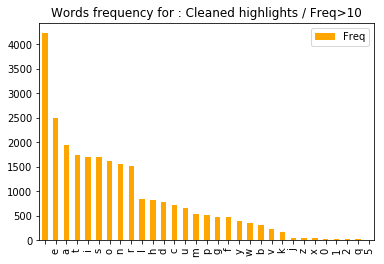

In [27]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_freq_hig,"Cleaned highlights",query="Freq>10")

* Plot of frequencies for claned articles.

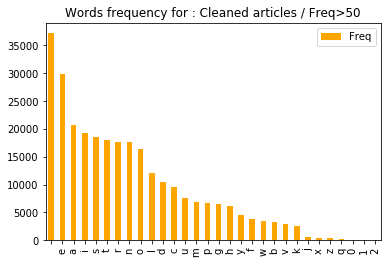

In [28]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_freq_art,"Cleaned articles",query="Freq>50")

#### TF-IDF computing over articles and highlights

* Files from cleaned articles and hilights are read.
* TF-IDF weights are computed for both type of content (articles and highlights)

In [29]:
import p6_util_activity
dict_article, dict_highlight = p6_util_activity.read_train_set(file_path)
print(len(dict_article), len(dict_highlight))

100 100


In [30]:
import p6_util_activity

vectorizer = p6_util_activity.compute_tfidf(dict_article, doc_type='string')
dict_tfidf_art = p6_util_activity.get_dict_tfidf(vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les articles traités: "+str(len(dict_tfidf_art.keys())))

vectorizer = p6_util_activity.compute_tfidf(dict_highlight, doc_type='string')
dict_tfidf_hig = p6_util_activity.get_dict_tfidf(vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les highlights traités: "+str(len(dict_tfidf_hig.keys())))


Taille du dictionnaire des valeurs TFIDF des mots pour les articles traités: 11495
Taille du dictionnaire des valeurs TFIDF des mots pour les highlights traités: 1988


### Test highlights predictions

**Read cleaned files**

In [31]:
import p6_util_activity
dict_article, dict_highlight = p6_util_activity.read_train_set(file_path,read_count=max_read_count)
print(len(dict_article), len(dict_highlight))

100 100


**Data is splitted into train and test**

* 70% dataset for training model
* 30% dataset for testing model

In [32]:
import p6_util_activity
dict_X_train, dict_X_test, dict_y_train, dict_y_test = p6_util_activity.split_train_test(dict_article, dict_highlight, train_ratio = 0.7)
print(len(dict_X_train), len(dict_X_test), len(dict_y_train), len(dict_y_test))

70 30 70 30


Compute TFIDF matrix from ``X`` using ``TfidfTransformer`` with option ``use_idf=True`` (default option)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm="l2", use_idf=True)
X_train = vectorizer.fit_transform(dict_X_train.values())
y_train = list(dict_y_train.values())

Use ``MultinomialNB`` as predictor

In [34]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [35]:
X_test = vectorizer.transform(dict_X_test.values())
y_test=list(dict_y_test.values())

In [36]:
y_pred = clf.predict(X_test)

In [37]:
n=10
print(y_pred[n])
print("\n---------------------------------\n")
print(y_test[n])
print("\n\n---------------------------------\n")
#print(vectorizer.inverse_transform(X_test[n]))


new tournament will go on without woods president of golfers foundation says woods had minor injuries in the onecar crash near his home early friday police will continue investigating after woods delays giving statement for third time woods on web site the only person responsible for the accident is me

---------------------------------

former aide to jim mcgreevey says he and the couple had sexual relations dina matos mcgreevey denies says husband has cronies after her jim mcgreevey confirms aides accounts given to reporters mcgreeveys are in the process of divorcing he announced resignation in 04


---------------------------------



Use ``RandomForest`` as predictor

In [38]:
from sklearn.ensemble import RandomForestClassifier

nb_estimators = 20
rfc = RandomForestClassifier(n_estimators=nb_estimators)
rfc_model = rfc.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

In [39]:
n=10
print(y_pred[n])
print("\n---------------------------------\n")
print(y_test[n])
print("\n\n---------------------------------\n")


canada says patient who traveled to nigeria tested negative for the virus zambia bans travelers from ebola countries guinea liberia and sierra leone and nigeria are battling ebola

---------------------------------

former aide to jim mcgreevey says he and the couple had sexual relations dina matos mcgreevey denies says husband has cronies after her jim mcgreevey confirms aides accounts given to reporters mcgreeveys are in the process of divorcing he announced resignation in 04


---------------------------------

